In [1]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from bids import BIDSLayout
import pandas as pd
import numpy as np
from itertools import product
import os

from util.viz import (
    plot_fsaverage, 
    plot_fsaverage_rgb, 
    plot_rgb_legend,
    zoom_visual_cortex, 
    plot_decoding_model,
    plot_decoding_roc
)

In [2]:
BIDS_DIR = 'bids_temp'
FIG_DIR = 'figures'

if not os.path.exists(FIG_DIR):
    os.mkdir(FIG_DIR)

In [3]:
layout = BIDSLayout(BIDS_DIR, derivatives = True)

In [4]:
def add_label(ax, label, x_offset = -.2, y_offset = .1, size = 50):
    xmin, xmax = ax.get_xlim()
    xscale = xmax - xmin
    ymin, ymax = ax.get_ylim()
    yscale = ymax - ymin
    ax.text(
        xmin + x_offset*xscale, ymax + yscale*y_offset, 
        label, size = size, weight = 'bold'
    )

Gtk-Message: 18:00:58.078: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:02.280: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:07.078: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:10.743: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:15.941: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:19.843: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:28.033: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:32.501: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:35.646: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:40.435: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:44.666: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:48.544: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:51.610: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:01:55.810: Failed to load module "canberra-gtk-module"
Gtk-Me

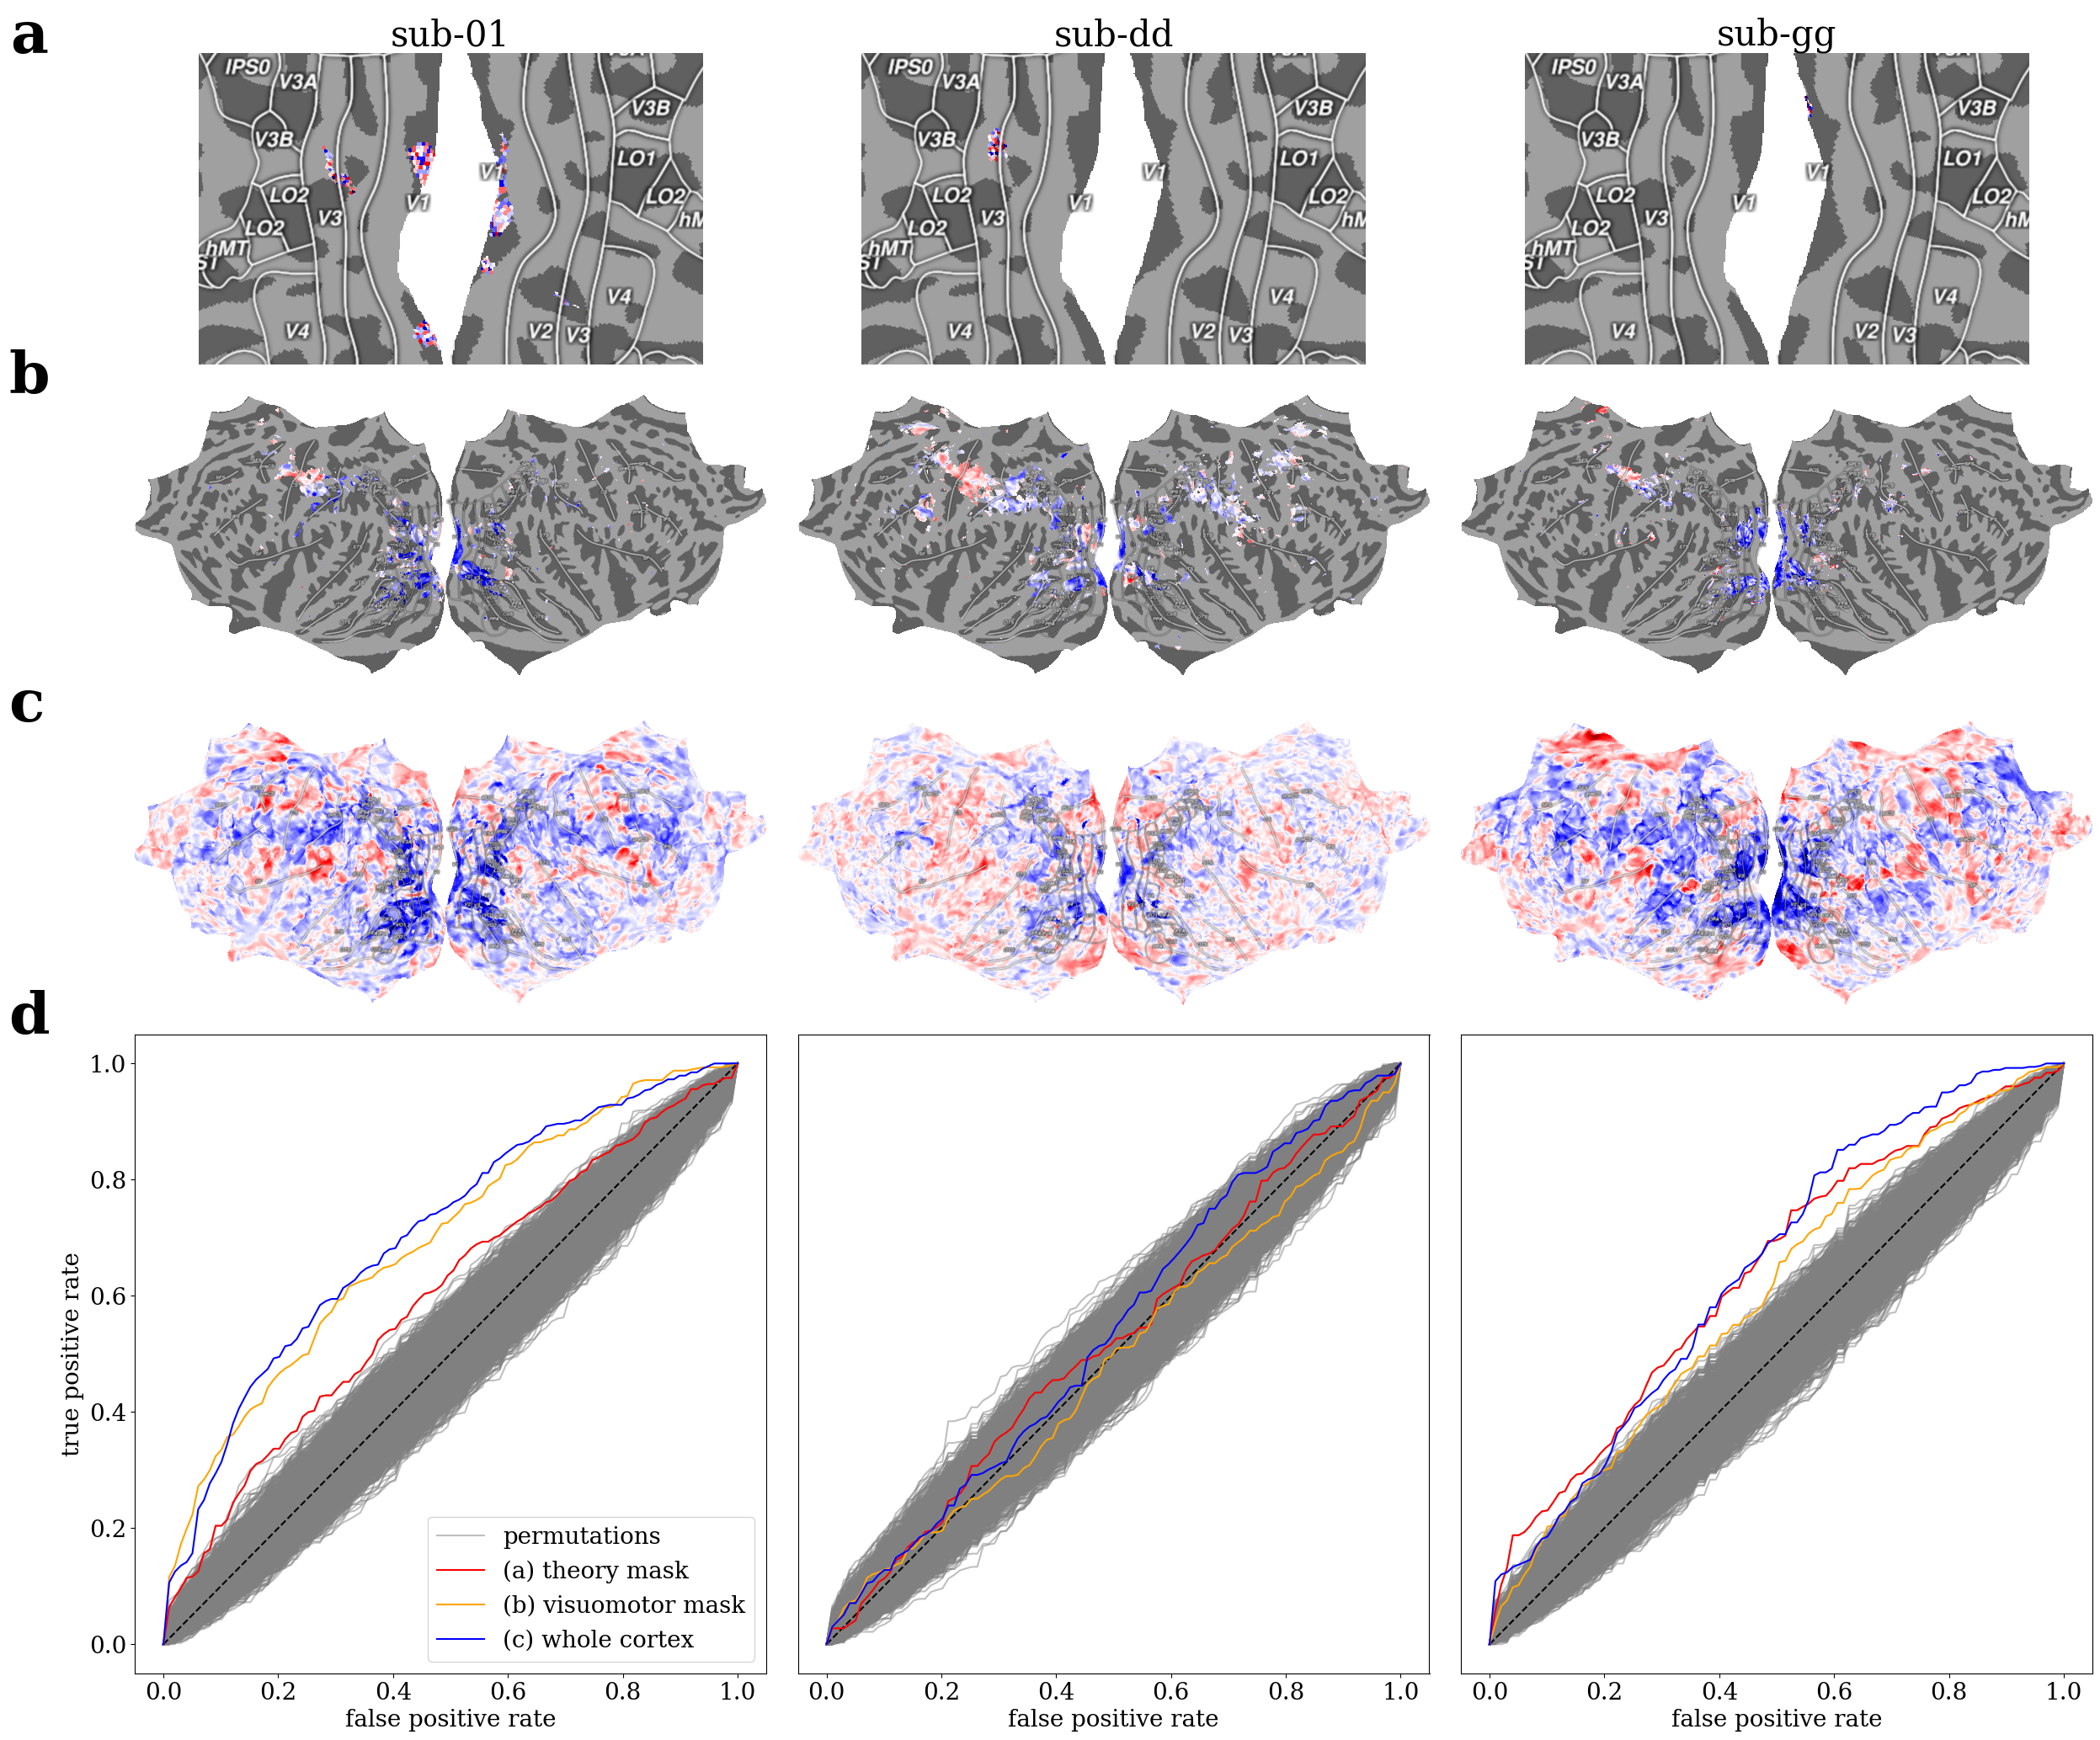

In [6]:
subs = layout.get_subjects(scope = 'decoding')
mods = ('theory', 'visuomotor', 'cortex')
n_subs = len(subs)
n_mods = len(mods)

w = 30
h = 15 + (w / n_subs)

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize = (w, h))
gs = gridspec.GridSpec(n_mods + 2, n_subs, wspace = .05, hspace = .05)

labels = ('a', 'b', 'c', 'd')

for i, j in product(range(n_mods), range(n_subs)):
    ax = fig.add_subplot(gs[i, j])
    plot_decoding_model(
        layout, subs[j], 
        show_sulci = False if mods[i] == 'theory' else True, 
        model = mods[i], 
        weight_type = 'filters', 
        ax = ax, 
        colorbar = False
    )
    if mods[i] == 'theory':
        zoom_visual_cortex(ax)
    if i == 0:
        ax.set_title('sub-%s'%subs[j], size = 30)
    if j == 0:
        offset = -.375 if i == 0 else -.2
        add_label(ax, labels[i], x_offset = offset, y_offset = 0.)

for j in range(n_subs):
    ax = fig.add_subplot(gs[n_mods:, j])
    plot_decoding_roc(layout, subs[j], ax, legend = (j == 0))
    if j == 0:
        add_label(ax, labels[-1], x_offset = -.2, y_offset = 0.)
    else:
        ax.get_yaxis().set_visible(False)

fpath = os.path.join(FIG_DIR, 'decoding.jpeg')
plt.savefig(fpath, dpi = 500, bbox_inches = 'tight')
plt.show()